In [34]:
pip install imgaug

     ------------------------------------ 948.0/948.0 KB 588.3 kB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 1.7 MB/s eta 0:00:00
     -------------------------------------- 313.3/313.3 KB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 24.5/24.5 MB 4.6 MB/s eta 0:00:00
     -------------------------------------- 222.9/222.9 KB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\ASUS\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
pip install augmentor

     ---------------------------------------- 78.3/78.3 KB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\ASUS\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow import random
import keras
import seaborn as sns
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.layers import AveragePooling2D,GlobalMaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [16]:
def count_images_in_folder(folder_path):
    try:
        # Membuat list semua file dalam folder
        files = os.listdir(folder_path)

        # Menghitung jumlah total file dalam folder
        total_files = len(files)

        return total_files
    except Exception as e:
        print(f"Error: {e}")
        return None
    
folder_normal = "./dataset/train/Normal/"
total_normal = count_images_in_folder(folder_normal)

folder_stone = "./dataset/train/Stone/"
total_stone = count_images_in_folder(folder_stone)

print(f"Jumlah total file dalam folder normal: {total_normal}")
print(f"Jumlah total file dalam folder stone: {total_stone}")


Jumlah total file dalam folder normal: 2619
Jumlah total file dalam folder stone: 678


In [17]:
import Augmentor

# Tentukan path ke folder dataset
input_folder = "./dataset/train"
output_folder = "./../../../augmented_dataset/stone"

# Tentukan path ke folder kelas 'stone'
stone_folder = os.path.join(input_folder, "stone")

# Inisialisasi objek pipeline Augmentor
pipeline = Augmentor.Pipeline(stone_folder, output_directory=output_folder)

# Tambahkan operasi augmentasi geometris yang diinginkan
pipeline.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
pipeline.flip_left_right(probability=0.5)
pipeline.flip_top_bottom(probability=0.5)

# Tentukan jumlah sampel yang dihasilkan (sesuaikan dengan kebutuhan Anda)
num_samples = (total_normal-total_stone)  # Misalnya, menghasilkan 500 gambar tambahan
print(f"\nBanyaknya gambar hasil augmentasi: {num_samples}")

# Jalankan proses augmentasi
pipeline.sample(num_samples)

print("Augmentasi geometris selesai. Gambar-gambar telah disimpan di", output_folder)


Initialised with 678 image(s) found.
Output directory set to ./dataset/train\stone\./../../../augmented_dataset/stone.
Banyaknya gambar hasil augmentasi: 1941


Processing <PIL.Image.Image image mode=RGB size=512x512 at 0x14A9D3943A0>: 100%|██████████| 1941/1941 [00:07<00:00, 259.68 Samples/s]                  

Augmentasi geometris selesai. Gambar-gambar telah disimpan di ./../../../augmented_dataset/stone


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15552\2549518350.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15552\2549518350.py:11: UserWarning:

The palette list has more values (6) than needed (2), which may not be intended.



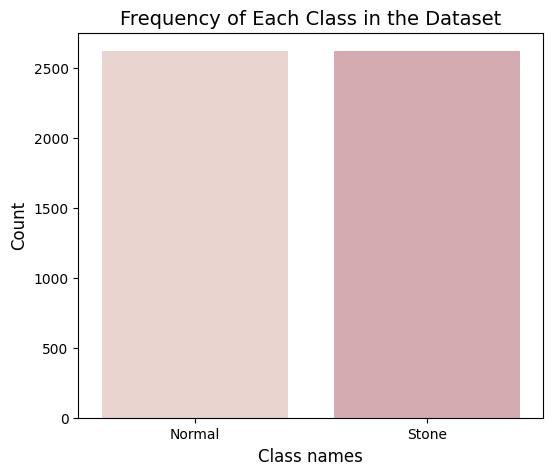

In [18]:
import plotly.express as px

class_names = ['Normal', 'Stone']

normal = len(os.listdir('./augmented_dataset/normal/'))
stone = len(os.listdir('./augmented_dataset/stone/'))

images = [normal, stone]

plt.figure(figsize=(6,5))
sns.barplot(x= class_names, y= images, palette= sns.cubehelix_palette())
plt.title('Frequency of Each Class in the Dataset', fontsize=14)
plt.xlabel('Class names', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(images)))
plt.show()
px.pie(names= class_names, values= images, color_discrete_sequence=px.colors.sequential.BuGn)

In [19]:
from keras.preprocessing import image
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from keras.utils import to_categorical

# Fungsi untuk memuat gambar dari folder dan mengonversi ke array numpy
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        img = image.load_img(path, target_size=(128, 128))  # Ubah ukuran gambar sesuai kebutuhan
        img_array = image.img_to_array(img)
        images.append(img_array)
        labels.append(folder.split('/')[-1])  # Ambil nama kelas dari nama folder

    return np.array(images), np.array(labels)

# Load dataset dari folder
normal_folder = "./augmented_dataset/normal"
stone_folder = "./augmented_dataset/stone"

normal_images, normal_labels = load_images_from_folder(normal_folder)
stone_images, stone_labels = load_images_from_folder(stone_folder)

# Menggabungkan gambar dan label dari kedua kelas
X = np.concatenate([normal_images, stone_images], axis=0)
y = np.concatenate([normal_labels, stone_labels], axis=0)

# Ubah label ke bentuk numerik
le = LabelEncoder()
y = le.fit_transform(y)

# Normalisasi nilai piksel ke rentang [0, 1]
X_train = X / 255.0
# Ubah label ke format one-hot encoding
y_train = to_categorical(y)

# Tampilkan distribusi kelas 
print('Distribusi kelas:', Counter(y))

Distribusi kelas: Counter({0: 2619, 1: 2619})


In [20]:
X_train.shape, y_train.shape

((5238, 128, 128, 3), (5238, 2))

In [21]:
# Load dataset dari folder
normal_folder = "./dataset/val/Normal"
stone_folder = "./dataset/val/Stone"

normal_images, normal_labels = load_images_from_folder(normal_folder)
stone_images, stone_labels = load_images_from_folder(stone_folder)

# Menggabungkan gambar dan label dari kedua kelas
X = np.concatenate([normal_images, stone_images], axis=0)
y = np.concatenate([normal_labels, stone_labels], axis=0)

# Ubah label ke bentuk numerik
le = LabelEncoder()
y = le.fit_transform(y)

# Normalisasi nilai piksel ke rentang [0, 1]
X_val = X / 255.0
# Ubah label ke format one-hot encoding
y_val = to_categorical(y)

# Tampilkan distribusi kelas 
print('Distribusi kelas:', Counter(y))

Distribusi kelas: Counter({0: 327, 1: 84})


In [22]:
X_val.shape, y_val.shape

((411, 128, 128, 3), (411, 2))

In [23]:
# Load dataset dari folder
normal_folder = "./dataset/test/Normal"
stone_folder = "./dataset/test/Stone"

normal_images, normal_labels = load_images_from_folder(normal_folder)
stone_images, stone_labels = load_images_from_folder(stone_folder)

# Menggabungkan gambar dan label dari kedua kelas
X = np.concatenate([normal_images, stone_images], axis=0)
y = np.concatenate([normal_labels, stone_labels], axis=0)

# Ubah label ke bentuk numerik
le = LabelEncoder()
y = le.fit_transform(y)

# Normalisasi nilai piksel ke rentang [0,1]
X_test = X / 255.0
# Ubah label ke format one-hot encoding
y_test = to_categorical(y)

# Tampilkan distribusi kelas 
print('Distribusi kelas:', Counter(y))

Distribusi kelas: Counter({0: 328, 1: 86})


In [24]:
X_test.shape, y_test.shape

((414, 128, 128, 3), (414, 2))

In [25]:
# Set the CNN model
input_shape = (128, 128, 3)
num_classes = 2

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

##############################
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
##############################
model.add(Flatten())

model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_9 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_10 (Ba  (None, 128, 128, 32)      128       
 tchNormalization)                                               
                                                                 
 average_pooling2d_4 (Avera  (None, 64, 64, 32)        0         
 gePooling2D)                                                    
                                                      

In [26]:
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import backend as K
import tensorflow as tf

# model = Model(pre_trained_model.input, x)
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, metrics=['accuracy',
                                            keras.metrics.Precision(name='precision'),
                                            keras.metrics.Recall(name='recall'),
                                            tf.keras.metrics.SpecificityAtSensitivity(0.0),
                                            tf.keras.metrics.SensitivityAtSpecificity(0.0)
                                          ])

In [27]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, 
                                            min_lr=0.000001, cooldown=2)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [35]:
batch_size = 32
epochs = 100

history = model.fit(X_train,y_train, batch_size=batch_size,
                              epochs = epochs, validation_data = (X_val, y_val),
                              verbose = 1, steps_per_epoch=(X_train.shape[0] // batch_size),
                              validation_steps=(X_val.shape[0] // batch_size),
                              callbacks=[learning_rate_reduction, early_stopping])

Epoch 1/100
163/163 [==============================] - 81s 497ms/step - loss: 0.0079 - accuracy: 0.9985 - precision: 0.9985 - recall: 0.9985 - specificity_at_sensitivity_1: 1.0000 - sensitivity_at_specificity_1: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - val_specificity_at_sensitivity_1: 1.0000 - val_sensitivity_at_specificity_1: 1.0000 - lr: 2.5000e-05
Epoch 2/100
163/163 [==============================] - 80s 494ms/step - loss: 0.0087 - accuracy: 0.9985 - precision: 0.9985 - recall: 0.9985 - specificity_at_sensitivity_1: 1.0000 - sensitivity_at_specificity_1: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - val_specificity_at_sensitivity_1: 1.0000 - val_sensitivity_at_specificity_1: 1.0000 - lr: 2.5000e-05
Epoch 3/100
163/163 [==============================] - 79s 487ms/step - loss: 0.0094 - accuracy: 0.9973 - precision: 0.9973 - recall: 0.9973 - specificity_at_sensitivity_1: 1.0000 - 

In [36]:
from sklearn.metrics import f1_score, classification_report

# Prediksi menggunakan model
y_pred_probs = model.predict(X_test)  # Gantilah x_test dengan data uji Anda
y_pred = np.argmax(y_pred_probs, axis=1)  # Ambil indeks kelas dengan probabilitas tertinggi

# Konversi hasil prediksi menjadi bentuk yang sesuai
y_true = np.argmax(y_test, axis=1)  # Gantilah y_test dengan label ground truth

# Hitung F1 Score
f1 = f1_score(y_true, y_pred, average='weighted')  # 'weighted' untuk klasifikasi multiclass

print("F1 Scores:", f1)

# Print laporan klasifikasi
print("Classification Report:")
print(classification_report(y_true, y_pred, digits=4))

13/13 [==============================] - 2s 165ms/step
F1 Scores: 1.0
Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       328
           1     1.0000    1.0000    1.0000        86

    accuracy                         1.0000       414
   macro avg     1.0000    1.0000    1.0000       414
weighted avg     1.0000    1.0000    1.0000       414



In [37]:
import math 

los, acc, pre, recall, sensitivity, specificity = model.evaluate(X_test, y_test, verbose=1)

print("Loss : ", los)
print("Acc : ", acc)
print("Precission : ", pre)
print("Recall : ", recall)
print("Sensitivity : ", sensitivity)
print("Specificity : ", specificity)
print("G-mean : ", math.sqrt(sensitivity*specificity))
# print("F1-Score : ", ((2*(pre*recall))/pre+recall))

# Hitung G-mean
g_mean = math.sqrt(sensitivity * specificity)

# Buat dataframe dengan data evaluasi
evaluation_data = {
    'Loss': [los],
    'Accuracy': [acc],
    'Precision': [pre],
    'Recall': [recall],
    'Sensitivity': [sensitivity],
    'Specificity': [specificity],
    'G-mean': [g_mean]
}

df = pd.DataFrame(evaluation_data)
df['f1_scores'] = f1
df['data'] = "Augmentation"
df['model'] = "CNN"
df['epoch'] = len(history.history['loss'])

# Tampilkan dataframe
print(df)

13/13 [==============================] - 2s 155ms/step - loss: 0.0028 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - specificity_at_sensitivity_1: 1.0000 - sensitivity_at_specificity_1: 1.0000
Loss :  0.0027574908453971148
Acc :  1.0
Precission :  1.0
Recall :  1.0
Sensitivity :  1.0
Specificity :  1.0
G-mean :  1.0
       Loss  Accuracy  Precision  Recall  Sensitivity  Specificity  G-mean  \
0  0.002757       1.0        1.0     1.0          1.0          1.0     1.0   

   f1_scores          data model  epoch  
0        1.0  Augmentation   CNN      6  


13/13 [==============================] - 2s 164ms/step


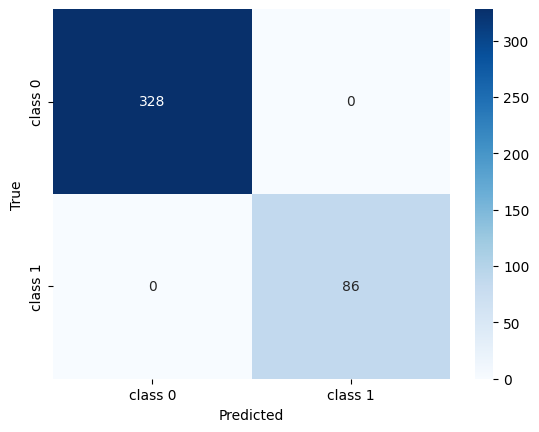

Classification report for classifier <keras.src.engine.sequential.Sequential object at 0x0000014B1963BB20>:
              precision    recall  f1-score   support

     class 0     1.0000    1.0000    1.0000       328
     class 1     1.0000    1.0000    1.0000        86

    accuracy                         1.0000       414
   macro avg     1.0000    1.0000    1.0000       414
weighted avg     1.0000    1.0000    1.0000       414




In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions to class labels
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to class labels
Y_true = np.argmax(y_test, axis=1)

# Get the number of classes (number of unique class labels)
num_classes = len(np.unique(Y_true))

# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Define class labels based on your specific problem
class_labels = ['class 0', 'class 1']

# Plot the confusion matrix
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Show the classification report
print("Classification report for classifier %s:\n%s\n"
      % (model, classification_report(Y_true, Y_pred_classes, target_names=class_labels, digits=4)))


Tes Privat Data

In [39]:
# Load dataset dari folder
normal_folder = "./privatData/Normal"
stone_folder = "./privatData/Stone"

normal_images, normal_labels = load_images_from_folder(normal_folder)
stone_images, stone_labels = load_images_from_folder(stone_folder)

# Menggabungkan gambar dan label dari kedua kelas
X = np.concatenate([normal_images, stone_images], axis=0)
y = np.concatenate([normal_labels, stone_labels], axis=0)

# Ubah label ke bentuk numerik
le = LabelEncoder()
y = le.fit_transform(y)

# Normalisasi nilai piksel ke rentang [0, 1]
X_privat = X / 255.0
# Ubah label ke format one-hot encoding
y_privat = to_categorical(y)

# Tampilkan distribusi kelas 
print('Distribusi kelas:', Counter(y))

Distribusi kelas: Counter({0: 540, 1: 446})


In [40]:
from sklearn.metrics import f1_score, classification_report

# Prediksi menggunakan model
y_pred_probs = model.predict(X_privat)  # Gantilah x_test dengan data uji Anda
y_pred = np.argmax(y_pred_probs, axis=1)  # Ambil indeks kelas dengan probabilitas tertinggi

# Konversi hasil prediksi menjadi bentuk yang sesuai
y_true = np.argmax(y_privat, axis=1)  # Gantilah y_test dengan label ground truth

# Hitung F1 Score
f1 = f1_score(y_true, y_pred, average='weighted')  # 'weighted' untuk klasifikasi multiclass

print("F1 Scores:", f1)

# Print laporan klasifikasi
print("Classification Report:")
print(classification_report(y_true, y_pred, digits=4))

31/31 [==============================] - 4s 139ms/step
F1 Scores: 0.5756930971900619
Classification Report:
              precision    recall  f1-score   support

           0     0.7000    0.4278    0.5310       540
           1     0.5290    0.7780    0.6298       446

    accuracy                         0.5862       986
   macro avg     0.6145    0.6029    0.5804       986
weighted avg     0.6226    0.5862    0.5757       986



In [41]:
import math 
import pandas as pd

los, acc, pre, recall, sensitivity, specificity = model.evaluate(X_privat, y_privat, verbose=1)

print("Loss : ", los)
print("Acc : ", acc)
print("Precission : ", pre)
print("Recall : ", recall)
print("Sensitivity : ", sensitivity)
print("Specificity : ", specificity)
print("G-mean : ", math.sqrt(sensitivity*specificity))
# print("F1-Score : ", ((2*(pre*recall))/pre+recall))

# Hitung G-mean
g_mean = math.sqrt(sensitivity * specificity)

# Buat dataframe dengan data evaluasi
evaluation_data = {
    'Loss': [los],
    'Accuracy': [acc],
    'Precision': [pre],
    'Recall': [recall],
    'Sensitivity': [sensitivity],
    'Specificity': [specificity],
    'G-mean': [g_mean]
}

df = pd.DataFrame(evaluation_data)
df['f1_scores'] = f1
df['data'] = "Tes Privat Augmentation"
df['model'] = "CNN"
df['epoch'] = len(history.history['loss'])

# Tampilkan dataframe
print(df)

31/31 [==============================] - 5s 145ms/step - loss: 1.2333 - accuracy: 0.5862 - precision: 0.5862 - recall: 0.5862 - specificity_at_sensitivity_1: 1.0000 - sensitivity_at_specificity_1: 1.0000
Loss :  1.2333396673202515
Acc :  0.5862069129943848
Precission :  0.5862069129943848
Recall :  0.5862069129943848
Sensitivity :  1.0
Specificity :  1.0
G-mean :  1.0
      Loss  Accuracy  Precision    Recall  Sensitivity  Specificity  G-mean  \
0  1.23334  0.586207   0.586207  0.586207          1.0          1.0     1.0   

   f1_scores                     data model  epoch  
0   0.575693  Tes Privat Augmentation   CNN      6  


31/31 [==============================] - 4s 140ms/step


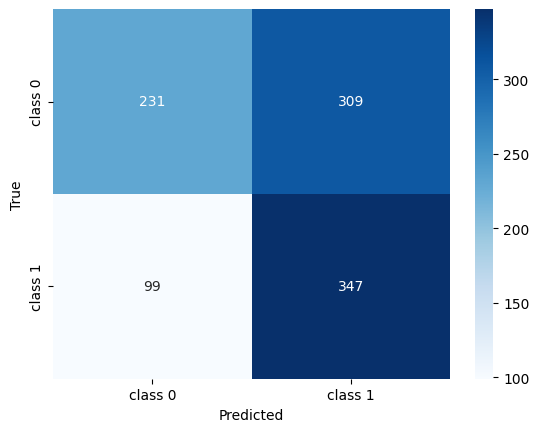

Classification report for classifier <keras.src.engine.sequential.Sequential object at 0x0000014B1963BB20>:
              precision    recall  f1-score   support

     class 0     0.7000    0.4278    0.5310       540
     class 1     0.5290    0.7780    0.6298       446

    accuracy                         0.5862       986
   macro avg     0.6145    0.6029    0.5804       986
weighted avg     0.6226    0.5862    0.5757       986




In [42]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict the values from the validation dataset
Y_pred = model.predict(X_privat)
# Convert predictions to class labels
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to class labels
Y_true = np.argmax(y_privat, axis=1)

# Get the number of classes (number of unique class labels)
num_classes = len(np.unique(Y_true))

# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Define class labels based on your specific problem
class_labels = ['class 0', 'class 1']

# Plot the confusion matrix
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Show the classification report
print("Classification report for classifier %s:\n%s\n"
      % (model, classification_report(Y_true, Y_pred_classes, target_names=class_labels, digits=4)))
